In [ ]:
import torch
torch.no_grad()
import sys
import pandas as pd
sys.path.append('..')
from wyckoff_transformer.tokenization import  load_tensors_and_tokenisers

In [89]:
all_predictions = torch.load("../generated/Dropbox/mp_20/energy/rpklwfji.pt", weights_only=True)
chgnet_predictions = pd.read_csv("../generated/Dropbox/mp_20/energy/chgnet_eform_mp20test_result.csv", index_col=0)

In [14]:
tensors, tokenizers, engineers = load_tensors_and_tokenisers("mp_20", "no_stop/augmented_harmony")

In [37]:
import gzip
import pickle
with gzip.open("../cache/mp_20/data.pkl.gz", "rb") as f:
    data = pickle.load(f)

In [32]:
target = tensors['test']['formation_energy_per_atom']
predictions = all_predictions[:, 0, 0]

In [94]:
(chgnet_predictions.chgnet_eform - target.numpy()).abs().mean()

0.034025470520282194

In [34]:
errors = (target - predictions).abs()

In [43]:
space_groups = data['test']['spacegroup_number']

In [51]:
sg_counts = space_groups.value_counts()
sg_popualtiry = sg_counts.loc[space_groups]

In [52]:
from scipy.stats import pearsonr
pearsonr(errors, sg_popualtiry)

PearsonRResult(statistic=-0.06599125993873624, pvalue=3.332990408724424e-10)

In [69]:
sg_counts > 10

spacegroup_number
225     True
12      True
139     True
194     True
62      True
       ...  
181    False
17     False
77     False
149    False
114    False
Name: count, Length: 157, dtype: bool

In [ ]:

error_per_sg = pd.Series(data=errors, index=sg_popualtiry.index).groupby(level=0).mean()
error_per_sg_std = pd.Series(data=errors, index=sg_popualtiry.index).groupby(level=0).std()
representative_sg = sg_counts > 10

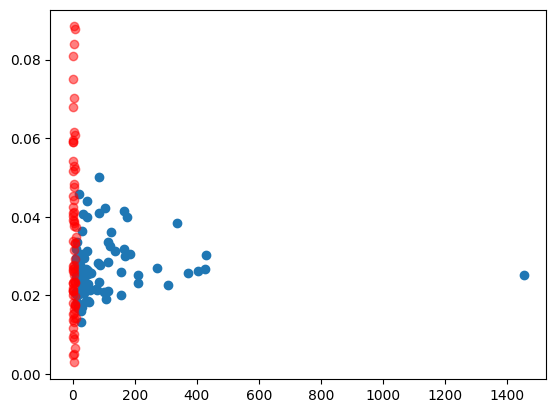

In [77]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(sg_counts[representative_sg], error_per_sg[representative_sg]);
ax.scatter(sg_counts[~representative_sg], error_per_sg[~representative_sg], color='red', alpha=0.5);

In [80]:
error_per_sg[representative_sg].mean(), error_per_sg[~representative_sg].mean()

(0.027044596, 0.034228012)

In [82]:
errors.mean()

tensor(0.0251)